<a href="https://colab.research.google.com/github/rickwag/ML/blob/main/IrisMulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data_url = "/content/sample_data/IRIS.csv"

In [2]:
#getting the data
import pandas as pd

df = pd.read_csv(data_url)

In [14]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#data preparation
#split training and testing data

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, : -1], df.iloc[:, -1], test_size=.2)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [42]:
print(y_train)
print(y_test)

[1 1 0 1 2 0 2 0 0 0 0 1 0 0 2 2 2 2 0 1 1 0 1 2 2 0 0 1 2 2 1 2 0 2 1 2 1
 0 2 1 1 2 0 2 2 1 2 2 0 2 1 2 2 2 1 2 1 2 2 0 0 0 1 1 2 0 2 1 1 2 1 2 0 1
 0 2 1 1 1 0 1 0 1 0 2 1 0 0 2 0 1 2 1 1 2 2 1 0 1 2 1 0 2 0 2 2 0 0 0 1 2
 1 0 0 1 0 1 2 1 1]
[0 0 1 1 0 0 2 0 2 2 0 0 1 0 2 2 2 1 0 0 0 2 1 2 1 1 1 1 0 0]


In [38]:
#model creation
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [39]:
#model training
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [43]:
#accuracy testing
model.score(X_test, y_test)

0.9

In [44]:
predictions = model.predict(X_test)

In [49]:
for n in range(5):
  print(f"actual => {encoder.inverse_transform([y_test[n]])} \t predicted => {encoder.inverse_transform([predictions[n]])}")

actual => ['Iris-setosa'] 	 predicted => ['Iris-setosa']
actual => ['Iris-setosa'] 	 predicted => ['Iris-setosa']
actual => ['Iris-versicolor'] 	 predicted => ['Iris-versicolor']
actual => ['Iris-versicolor'] 	 predicted => ['Iris-versicolor']
actual => ['Iris-setosa'] 	 predicted => ['Iris-setosa']


In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  3,  5]])

Text(33.0, 0.5, 'truth')

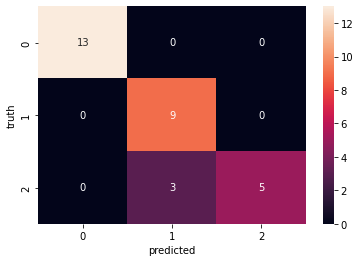

In [55]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")